<a href="https://colab.research.google.com/github/PradeepKumarM30/practiceAndLearn/blob/main/transferlearning/stepdrageffnetmilestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image
#from matplotlib import image
from numpy import asarray
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import numpy as np



# TASK 2 : Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 24.76 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os
main_dir = '/content/datasets/Data'
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [4]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(421).jpg', 'COVID19(1).jpg', 'COVID19(496).jpg', 'COVID19(487).jpg', 'COVID19(481).jpg', 'COVID19(378).jpg', 'COVID19(557).jpg', 'COVID19(474).jpg', 'COVID19(340).jpg', 'COVID19(354).jpg']
['NORMAL(1090).jpg', 'NORMAL(423).jpg', 'NORMAL(1459).jpg', 'NORMAL(1145).jpg', 'NORMAL(114).jpg', 'NORMAL(360).jpg', 'NORMAL(1127).jpg', 'NORMAL(510).jpg', 'NORMAL(633).jpg', 'NORMAL(1317).jpg']
['COVID19(464).jpg', 'COVID19(158).jpg', 'COVID19(58).jpg', 'COVID19(64).jpg', 'COVID19(396).jpg', 'COVID19(160).jpg', 'COVID19(172).jpg', 'COVID19(186).jpg', 'COVID-19 (831).jpg', 'COVID19(350).jpg']
['NORMAL(118).jpg', 'NORMAL(727).jpg', 'NORMAL(560).jpg', 'NORMAL(1131).jpg', 'NORMAL(9).jpg', 'NORMAL(291).jpg', 'NORMAL(108).jpg', 'NORMAL(10).jpg', 'NORMAL(650).jpg', 'NORMAL(877).jpg']


In [5]:
import numpy
directory = train_covid_dir 
length_train_covid = len(train_covid_names)
max = 0
#new_array = np.zeros((400,1600),dtype = np.uint8)
#np_main_array = np.empty((length_train_covid,),dtype = np.uint8)
np_main_array = [[]]
count = 0 
index = 0
master_list = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    image = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(image):
        #print(image)
        image = Image.open(image)
        new_image = image.resize((400,400),)
        data = asarray(new_image)
        
        if(data.ndim == 3 and data.shape[2] == 3):
          new_array = np.zeros((400,1200),dtype = np.uint8)
          print("new array shape: ",new_array.shape,"data shape: ",data.shape)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
        elif(data.ndim == 3 and data.shape[2] == 4):
          new_array = np.zeros((400,1600),dtype = np.uint8)
          new_array += data.reshape(data.shape[0],data.shape[1]*data.shape[2])
          temp_max = data.shape[1]
      #  if(count == 0):
      #    print("before flatten: ",data)
        #print(data.shape)
        data = data.flatten()
        new_array = new_array.flatten()
        if(new_array.shape[0] != 640000):
          new_array.resize(640000)
        print(new_array.shape)
    #    if(count == 0):
    #      print("after flatten: ",data)
       # img_array = np.array(Image.open(image).resize((200,200)))
       # print(data.shape)
        #np_main_array = np.append(np_main_array,np.array(data),axis = 0)
        #np_main_array[,index] = data;
        #np_main_array.append([])
       # np_main_array[index].append(data)
        index = index + 1
        master_list.append(new_array)
  #      if(count <= 2):
  #        print("master list: ",master_list)
  #        print("array: ",np_main_array)
  #      count = count + 1


        
print(len(master_list))


        



new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
(640000,)
(640000,)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
(640000,)
(640000,)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
(640000,)
new array shape:  (400, 1200) data shape:  (400, 400, 3)
(640000,)
(640000,)
new array shape:

before Resize :


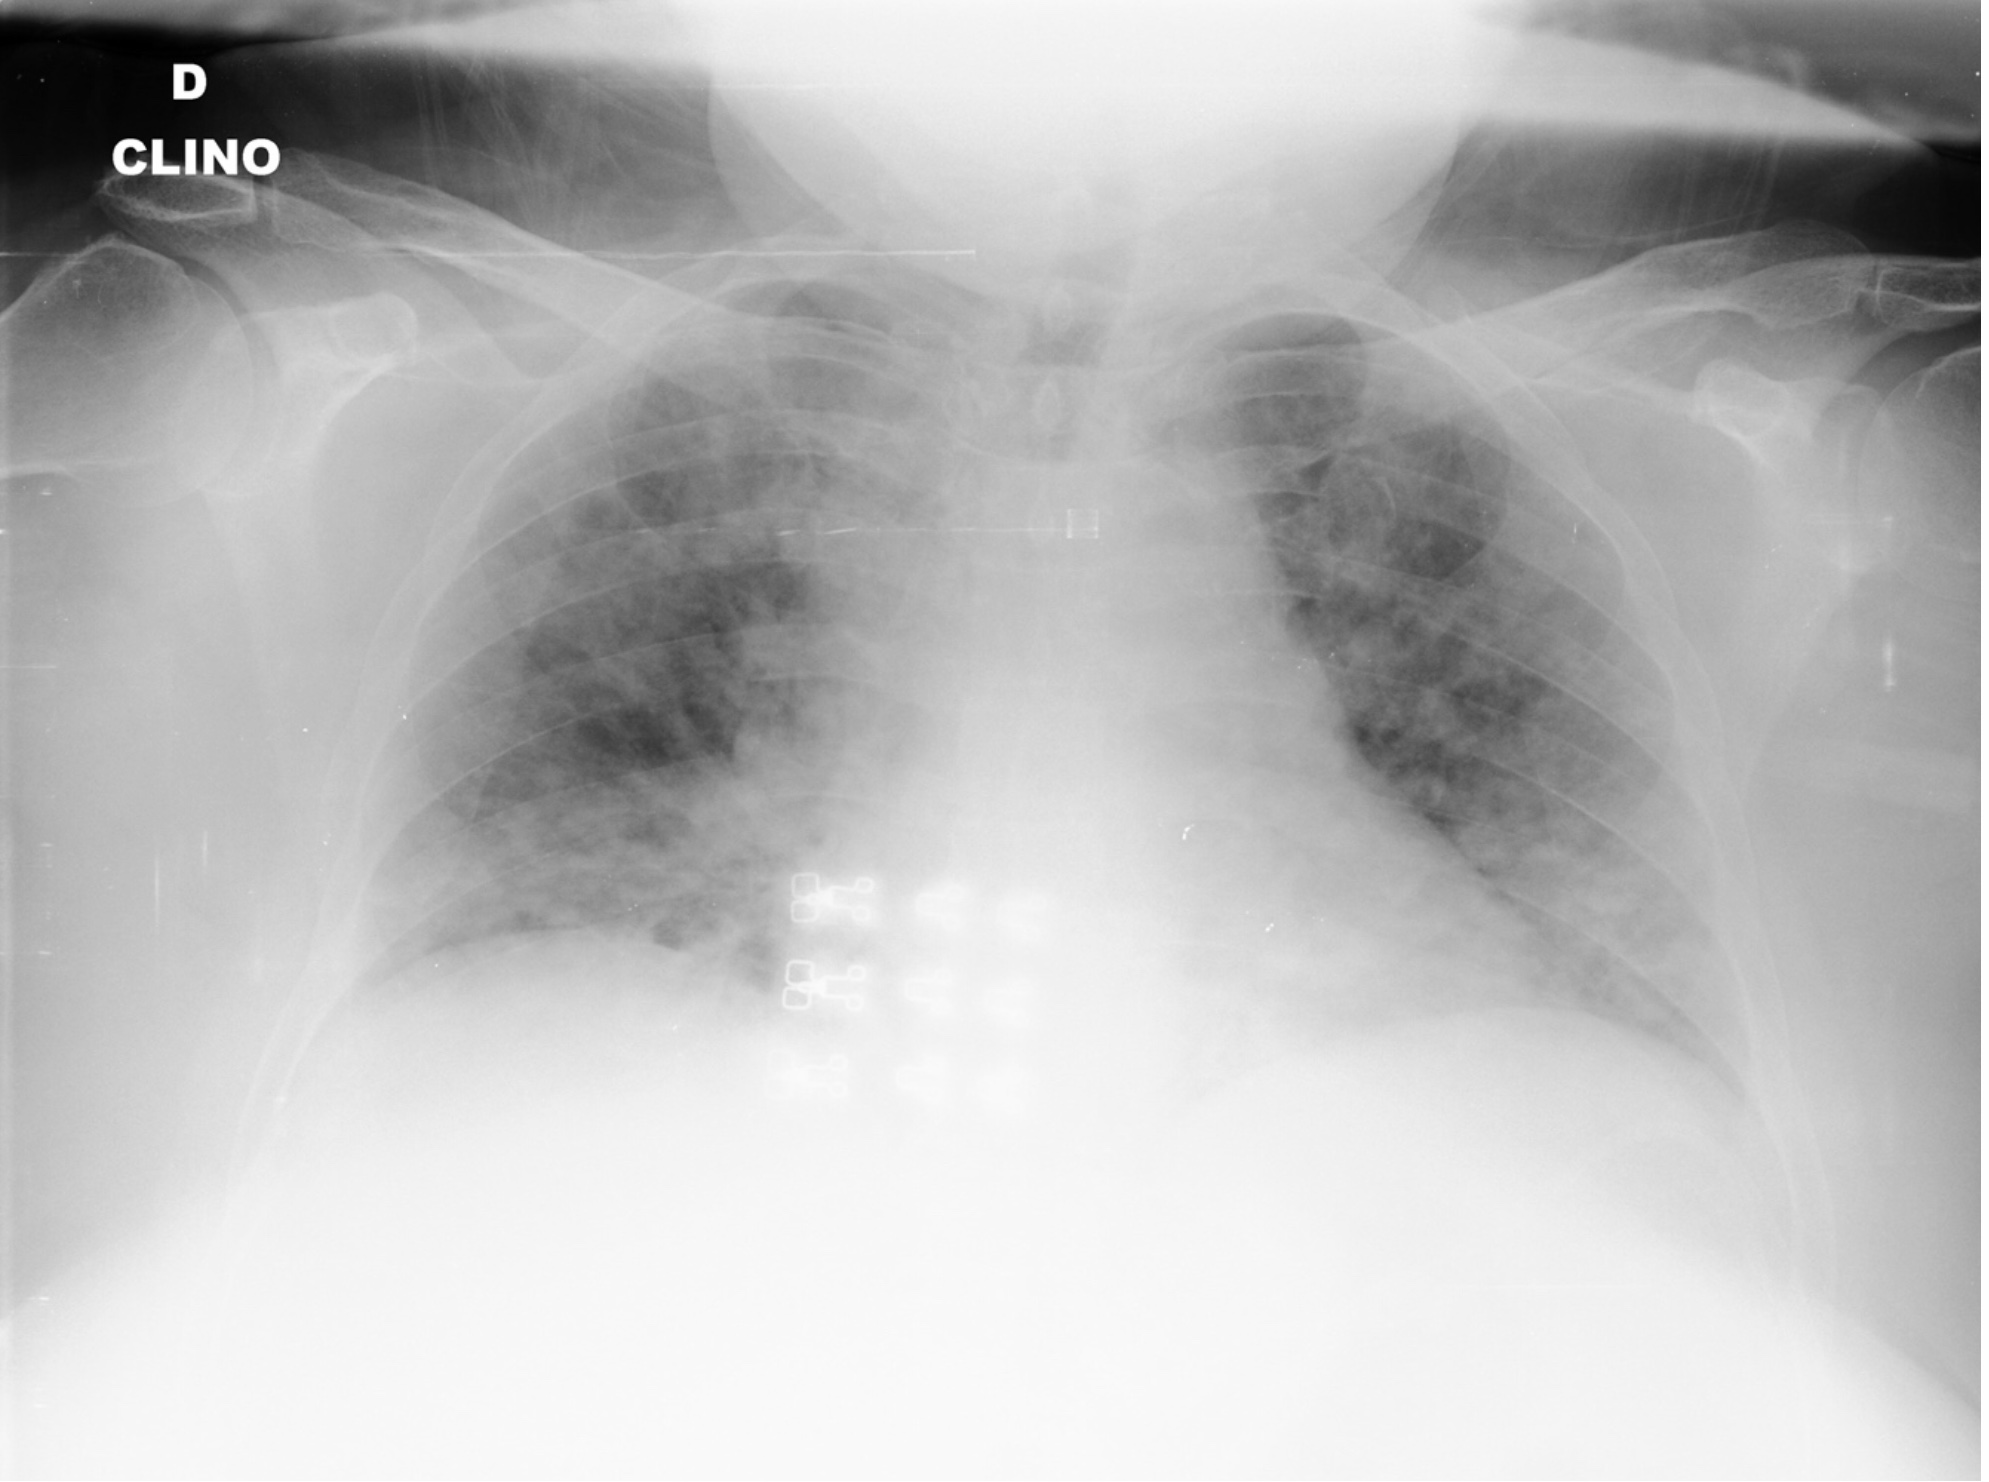

After Resize :


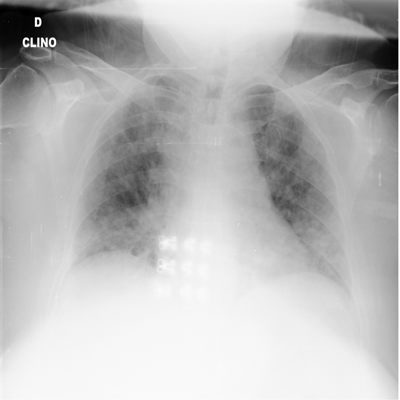

In [21]:
directory = train_covid_dir 
count = 0;
for filename in os.listdir(directory):
    image = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(image):
        im = Image.open(image)
        if(count == 1):
          print("before Resize :")
          im.show()
          display(im)
        new_image = im.resize((400,400),)
        if(count == 1):
          print("After Resize :")
          new_image.show()
          display(new_image)
        count += 1


In [6]:
print(master_list)

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([141, 141, 141, ...,   0,   0,   0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([  1,   1,   1, ...,  84,  84, 255], dtype=uint8), array([  1,   1,   1, ...,  84,  84, 255], dtype=uint8), array([  1,   1,   1, ...,  84,  84, 255], dtype=uint8), array([237, 237, 237, ...,   0,   0,   0], dtype=uint8), array([96, 96, 96, ...,  0,  0,  0], dtype=uint8), array([96, 96, 96, ...,  0,  0,  0], dtype=uint8), array([96, 96, 96, ...,  0,  0,  0], dtype=uint8), array([77, 77, 77, ...,  0,  0,  0], dtype=uint8), array([10, 10, 10, ...,  0,  0,  0], dtype=uint8), array([ 77,  77,  77, ..., 136, 136, 255], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8

In [7]:
array_recombined = np.vstack(master_list)
print(array_recombined)


[[  0   0   0 ...   0   0   0]
 [141 141 141 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [126 124 125 ...   0   0   0]
 [ 90  90  90 ...   0   0   0]
 [ 90  90  90 ...   0   0   0]]


In [31]:
index_names = []
feature_names = []
for i in range (1,546):
  index_names.append("sample "+str(i))
for i in range (1,640001):
  feature_names.append("feature "+str(i))



df = pd.DataFrame(array_recombined,index = (index_names),columns = (feature_names))
print(df)

#array_meannormalised = array_recombined - np.mean(array_recombined,axis=1)

            feature 1  feature 2  feature 3  feature 4  feature 5  feature 6  \
sample 1            0          0          0          0          0          0   
sample 2          141        141        141        136        136        136   
sample 3            0          0          0          0          0          0   
sample 4            0          0          0          0          0          0   
sample 5            0          0          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
sample 541         10         10          9         11         11         10   
sample 542        126        124        125        129        127        127   
sample 543        126        124        125        129        127        127   
sample 544         90         90         90         91         91         91   
sample 545         90         90         90         91         91         91   

            feature 7  feature 8  featu

In [32]:
df_normalised = df
for i in range (0,len(df)):
  df_normalised.iloc[:,i] = (df.iloc[:,i] - df.iloc[:,i].mean()) / df.iloc[:,i].std()

print(df_normalised)



            feature 1  feature 2  feature 3  feature 4  feature 5  feature 6  \
sample 1    -0.901744  -0.906940  -0.906448  -0.952742  -0.848666  -0.850853   
sample 2     0.701517   0.699538   0.699232   0.439828   0.778924   0.777141   
sample 3    -0.901744  -0.906940  -0.906448  -0.952742  -0.848666  -0.850853   
sample 4    -0.901744  -0.906940  -0.906448  -0.952742  -0.848666  -0.850853   
sample 5    -0.901744  -0.906940  -0.906448  -0.952742  -0.848666  -0.850853   
...               ...        ...        ...        ...        ...        ...   
sample 541  -0.788038  -0.793006  -0.803958  -0.840108  -0.717022  -0.731148   
sample 542   0.530957   0.505849   0.517027   0.368152   0.671216   0.669406   
sample 543   0.530957   0.505849   0.517027   0.368152   0.671216   0.669406   
sample 544   0.121614   0.118471   0.118454  -0.020949   0.240384   0.238466   
sample 545   0.121614   0.118471   0.118454  -0.020949   0.240384   0.238466   

            feature 7  feature 8  featu

In [34]:
revitalised_array = df_normalised.to_numpy()
print(revitalised_array)
non_revitalised_array = df.to_numpy()

[[-0.9017444  -0.90694029 -0.90644821 ...  0.          0.
   0.        ]
 [ 0.70151671  0.69953751  0.69923199 ...  0.          0.
   0.        ]
 [-0.9017444  -0.90694029 -0.90644821 ...  0.          0.
   0.        ]
 ...
 [ 0.53095702  0.5058487   0.51702714 ...  0.          0.
   0.        ]
 [ 0.12161376  0.11847107  0.11845404 ...  0.          0.
   0.        ]
 [ 0.12161376  0.11847107  0.11845404 ...  0.          0.
   0.        ]]


unnormalised image :


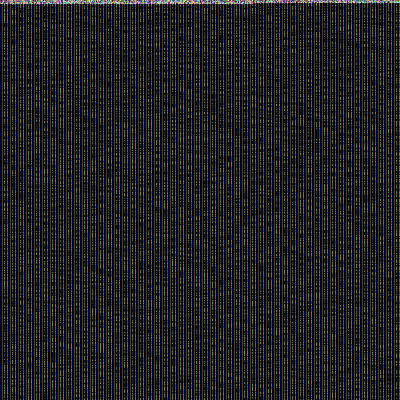

normalised image :


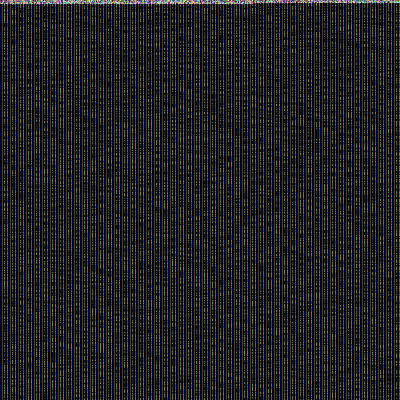

In [37]:
one_row_in_normalised = revitalised_array[543,]
one_row_in_unnormalised = non_revitalised_array[543,]
one_row_in_normalised = one_row_in_normalised.reshape(400,400,-1)
one_row_in_unnormalised = one_row_in_unnormalised.reshape(400,400,-1)
print("unnormalised image :")
img_un = Image.fromarray(one_row_in_unnormalised,'RGB')
img_un.show()
display(img_un)
print("normalised image :")
img = Image.fromarray(one_row_in_normalised,'RGB')
img.show()
display(img)

In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))


Total images present in the training set: 1811
Total images present in the testing set: 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(513).jpg', '/content/datasets/Data/train/COVID19/COVID19(476).jpg', '/content/datasets/Data/train/COVID19/COVID19(473).jpg', '/content/datasets/Data/train/COVID19/COVID19(340).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (34).jpg', '/content/datasets/Data/train/COVID19/COVID19(367).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (186).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (4).jpg']      ['/content/datasets/Data/train/NORMAL/NORMAL(942).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(773).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(111).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(604).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(395).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1376).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1066).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1413).jpg']


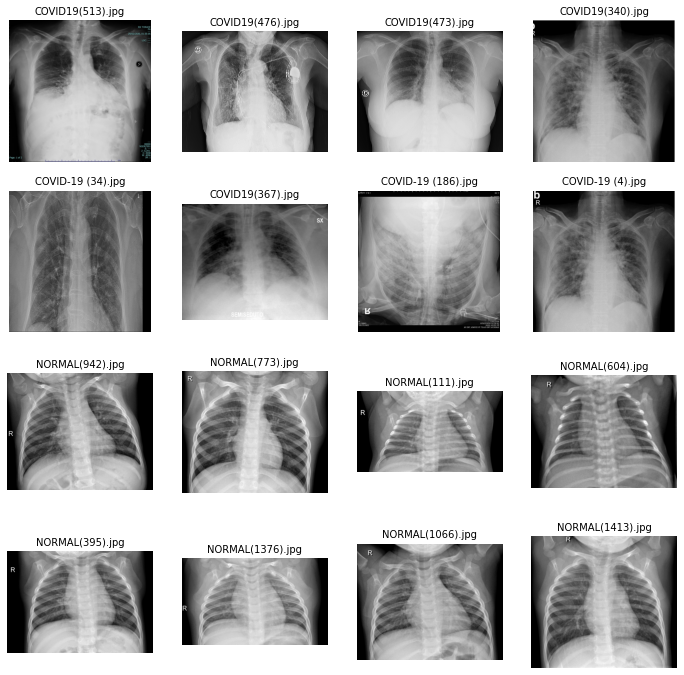

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg


#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic,'    ',normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',)[-1]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
"""data_gen_args_train = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     validation_split = 0.2,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     horizontal_flip = True)

data_gen_args_val = dict(featurewise_center=True,
                                featurewise_std_normalization=True)

data_gen_args_test = dict(featurewise_center=True,
                                featurewise_std_normalization=True)

image_datagen_train = ImageDataGenerator(**data_gen_args_train)
image_datagen_val = ImageDataGenerator(**data_gen_args_val)
image_datagen_test = ImageDataGenerator(**data_gen_args_test)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_datagen_train.fit(train_dir, augment=True, seed=seed)
image_datagen_val.fit(train_dir, augment=True, seed=seed)
image_datagen_test.fit(test_dir, augment=True, seed=seed)



train_generator = image_datagen_train.flow_from_directory(
    train_dir,
    target_size = (128,128),
    subset = 'training',
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

validation_generator = image_datagen_val.flow_from_directory(
    train_dir,
    target_size = (128,128),
    subset = 'validation',
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

test_generator = image_datagen_test.flow_from_directory(
    test_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary',
    seed=seed)

"""
dgen_train = ImageDataGenerator(samplewise_std_normalization=True,
                                #samplewise_center=True,
                                rotation_range=20,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)


#https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
dgen_validation = ImageDataGenerator(samplewise_std_normalization=True)
dgen_test = ImageDataGenerator(samplewise_std_normalization=True)

train_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (128,128),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (128,128),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir, 
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.white_list_formats


('png', 'jpg', 'jpeg', 'bmp', 'ppm', 'tif', 'tiff')

In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(128, 128, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 37, 37, 64)       

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 57s 1s/step - loss: 1.0595 - accuracy: 0.7626 - val_loss: 0.3605 - val_accuracy: 0.8923
Epoch 2/5
46/46 [==============================] - 54s 1s/step - loss: 0.2811 - accuracy: 0.8875 - val_loss: 0.2699 - val_accuracy: 0.9530
Epoch 3/5
46/46 [==============================] - 53s 1s/step - loss: 0.1910 - accuracy: 0.9303 - val_loss: 0.2217 - val_accuracy: 0.9337
Epoch 4/5
46/46 [==============================] - 53s 1s/step - loss: 0.1843 - accuracy: 0.9365 - val_loss: 0.1414 - val_accuracy: 0.9558
Epoch 5/5
46/46 [==============================] - 54s 1s/step - loss: 0.1720 - accuracy: 0.9282 - val_loss: 0.1803 - val_accuracy: 0.9586


# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

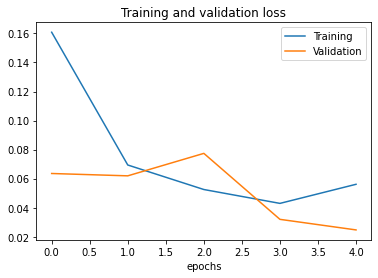

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

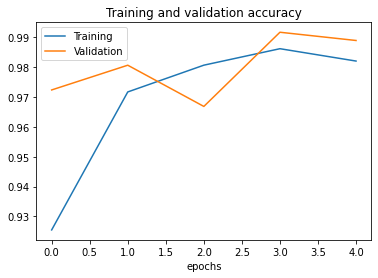

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
# get the test acuarcy and loss
test_loss, test_accuracy = custom_model.evaluate(test_generator)
print('test loss : {} test acc : {}'.format(test_loss,test_accuracy))


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 13s 783ms/step - loss: 0.0365 - accuracy: 0.9814
test loss : 0.03651377931237221 test acc : 0.9814049601554871


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename 
  img = image.load_img(img_path,target_size= (128,128))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis = 0)
  prediction = custom_model.predict(images)
  print(filename)


  if prediction == 0:
    print('Covid detected')
  else:
    print('Your report is normal')



Saving NORMAL(10).jpeg to NORMAL(10).jpeg
NORMAL(10).jpeg
Your report is normal


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mnet = MobileNetV2(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (128,128,3))
mnet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
def create_model():
  new_model = Sequential([
                          mnet,
                          Flatten(),
                          Dropout(0.5),
                          Dense(1,activation='sigmoid'),
                          ])
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = custom_model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 93s 1s/step - loss: 0.3040 - accuracy: 0.8682 - val_loss: 0.1480 - val_accuracy: 0.9254
Epoch 2/5
46/46 [==============================] - 51s 1s/step - loss: 0.1323 - accuracy: 0.9510 - val_loss: 0.1104 - val_accuracy: 0.9613
Epoch 3/5
46/46 [==============================] - 51s 1s/step - loss: 0.0991 - accuracy: 0.9614 - val_loss: 0.1029 - val_accuracy: 0.9586
Epoch 4/5
46/46 [==============================] - 51s 1s/step - loss: 0.0965 - accuracy: 0.9669 - val_loss: 0.0930 - val_accuracy: 0.9696
Epoch 5/5
46/46 [==============================] - 52s 1s/step - loss: 0.0766 - accuracy: 0.9710 - val_loss: 0.0992 - val_accuracy: 0.9696


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

effnet = EfficientNetB0(include_top = False, pooling = 'avg', weights = 'imagenet',
                    input_shape = (128,128,3))

effnet.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 128, 128, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
def create_model():
  #new_model = Sequential([
  #                        effnet,
  #                        Flatten(),
  #                        Dropout(0.5),
  #                        Dense(1,activation='sigmoid'),
  #                        ])
  new_model = Sequential([
                          effnet,
                          Flatten(),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(256,activation='relu'),
                          Dropout(0.2),
                          Dense(1,activation='sigmoid')])
                        
  new_model.layers[0].trainable = False
  new_model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = 'accuracy')
  
  return new_model

custom_model = create_model()
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [ ]:
history = custom_model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 93s 2s/step - loss: 0.6340 - accuracy: 0.6894 - val_loss: 0.6285 - val_accuracy: 0.6989
Epoch 2/5
46/46 [==============================] - 85s 2s/step - loss: 0.6216 - accuracy: 0.6984 - val_loss: 0.6226 - val_accuracy: 0.6989
Epoch 3/5
46/46 [==============================] - 84s 2s/step - loss: 0.6203 - accuracy: 0.6991 - val_loss: 0.6113 - val_accuracy: 0.6989
Epoch 4/5
46/46 [==============================] - 86s 2s/step - loss: 0.6226 - accuracy: 0.6991 - val_loss: 0.6118 - val_accuracy: 0.6989
Epoch 5/5
46/46 [==============================] - 85s 2s/step - loss: 0.6248 - accuracy: 0.6991 - val_loss: 0.6127 - val_accuracy: 0.6989
